In [1]:
# These are the libraries we used - feel free to import any other libraries as necessary

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# You may have to download beautifulsoup by uncommenting and running the line below
# !pip install beautifulsoup4

from bs4 import BeautifulSoup

import requests

# Etsy Web Scraping  
Pick an item/category, such as "Backpacks". Feel free to pick any item/category you want!

### Make a histogram of item prices on the first page.  
Use beautifulsoup to get the prices of all the items on the first page (as in the first page product results). Refer to the workshop demo if needed!

Hint: which CSS class can be used to find all of the price tags?

In [41]:
# Request URL
page = requests.get("https://www.etsy.com/c/bags-and-purses/backpacks?ref=pagination&page=1")

# Fetch webpage
soup = BeautifulSoup(page.content,"html.parser")
# print(soup.prettify())

In [42]:
# Get a list of all 'span' tags with CSS class 'currency-value'
all_tags = soup.find_all("span", class_="currency-value", text=True)

In [43]:
# Get a list of the text content inside each of the lines found above
texts = []
for i in all_tags:
    texts.append(i.findAll(text=True))

In [5]:
# Convert the list of prices to floats
item_prices = [float(i[0].replace(',','')) for i in texts]
item_prices = np.array(item_prices)

Text(0.5, 1.0, 'Costs of Backpacks on Page 1')

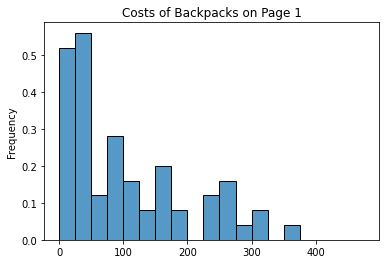

In [6]:
sns.histplot(item_prices, stat="frequency", bins=np.arange(0,500,25))
plt.title('Costs of Backpacks on Page 1')

### What is the mean of the prices in the first page?

In [7]:
np.mean(item_prices)

106.01819672131148

## What is the distribution of prices in the second page?

In [14]:
# Same steps as above
def get_prices(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content,"html.parser")
    
    all_tags = soup.find_all("span", class_="currency-value", text=True)
    
    texts = []
    for i in all_tags:
        texts.append(i.findAll(text=True))
    
    item_costs = [float(i[0].replace(',','')) for i in texts]
    return np.array(item_costs)

In [15]:
item_prices_2 = get_prices("https://www.etsy.com/c/bags-and-purses/backpacks?ref=pagination&page=2")

Text(0.5, 1.0, 'Costs of Backpacks on Page 2')

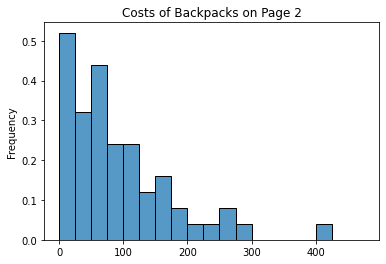

In [16]:
sns.histplot(item_prices_2, stat="frequency", bins=np.arange(0,500,25))
plt.title('Costs of Backpacks on Page 2')

### What is the mean of prices on the second page?

In [17]:
np.mean(item_prices_2)

118.67688524590166

## What is the distribution of prices in the first 20 pages?

In [44]:
# Get the prices of items in the first 20 pages by repeating the same process for modified urls
item_prices_first_20 = np.array([])
for i in range(1,21):
    item_prices_i = get_prices("https://www.etsy.com/c/bags-and-purses/backpacks?ref=pagination&page=" + str(i))
    item_prices_first_20 = np.append(item_prices_first_20, item_prices_i)

Text(0.5, 1.0, 'Costs of Backpacks on First 20 Pages')

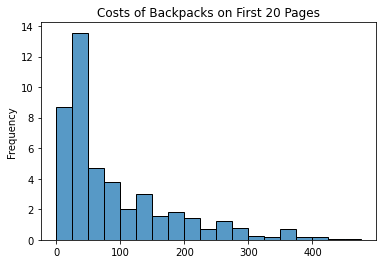

In [31]:
sns.histplot(item_prices_first_20, stat="frequency", bins=np.arange(0,500,25))
plt.title('Costs of Backpacks on First 20 Pages')

## Is there a relationship between the page number and the average price of items on that page?

Support your answer with a visualization

In [32]:
page_numbers = np.arange(1,21)
mean_prices = np.array([])

for i in page_numbers:
    item_prices_i = get_prices("https://www.etsy.com/c/bags-and-purses/backpacks?ref=pagination&page=" + str(i))
    mean_prices = np.append(mean_prices, np.mean(item_prices_i))

Text(0.5, 1.0, 'Mean price of backpacks on each page')

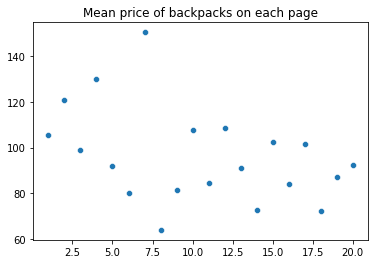

In [34]:
sns.scatterplot(x=page_numbers, y=mean_prices)
plt.title("Mean price of backpacks on each page")

Answer: no, probably not